In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers=pd.read_csv('Ecommerce Customers Dataset')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:

customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


In [7]:
# Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.
# Does the correlation make sense?

sns.set_palette('GnBu_d')
sns.set_style('darkgrid')

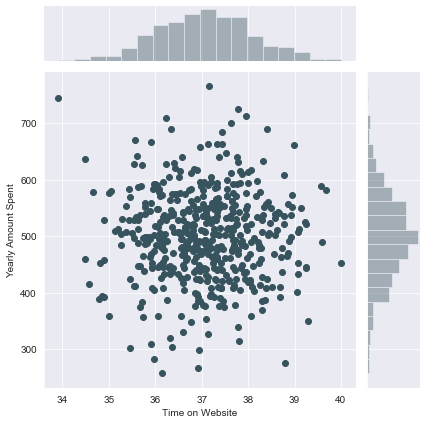

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

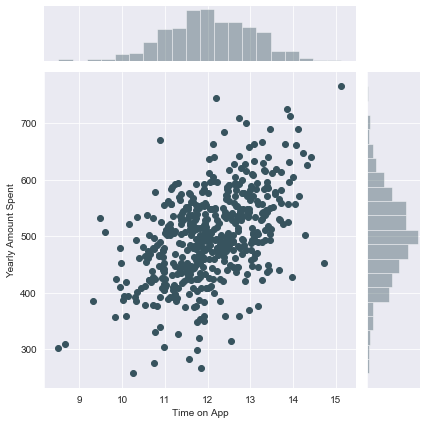

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

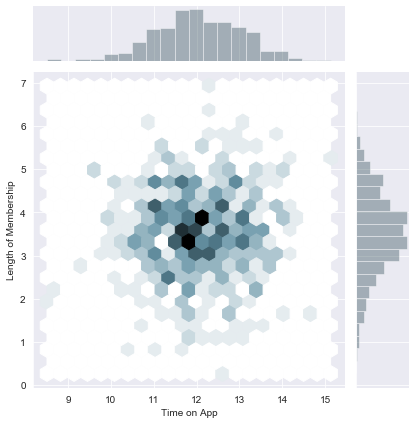

In [11]:
# Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

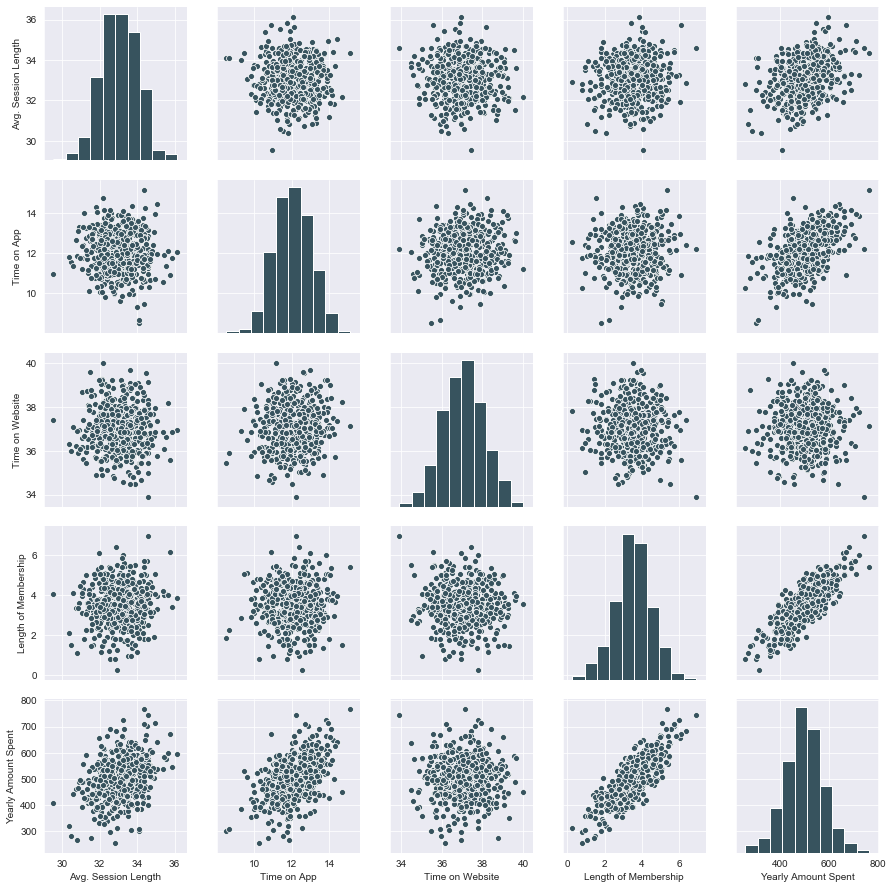

In [12]:
# Let's explore these types of relationships across the entire data set.

sns.pairplot(customers)

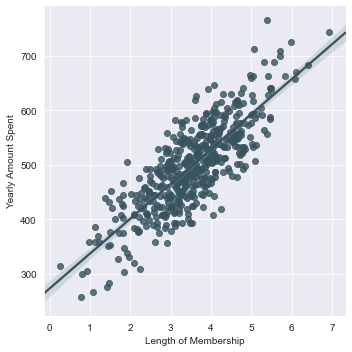

In [13]:
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [14]:
# Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [15]:
Y=customers['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_Train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:

lm=LinearRegression()

In [21]:
lm.fit(X_train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [23]:
Predicted_Y=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

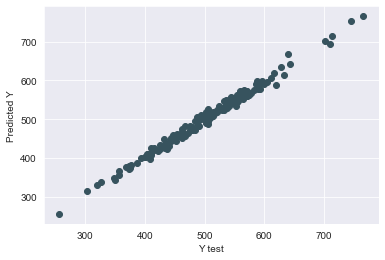

In [24]:
plt.scatter(Y_test,Predicted_Y)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [25]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,Predicted_Y))
print('MSE:',metrics.mean_squared_error(Y_test,Predicted_Y))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Predicted_Y)))

MAE: 7.2281486534308295
MSE: 79.81305165097434
RMSE: 8.933815066978628


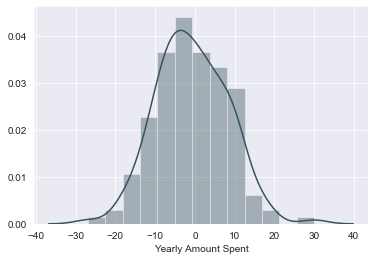

In [26]:
sns.distplot((Y_test-Predicted_Y))

In [27]:
cfd=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cfd

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
